<a href="https://colab.research.google.com/github/KareemaKilani/KareemaKilani.github.io/blob/master/BostonDataEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Kareema Kilani
##### 2/17/2023

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
import seaborn as sns
from pandas.plotting import scatter_matrix

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
df = pd.read_csv("/Users/d3/desktop/Python/boston.csv")
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
Y1 = pd.DataFrame(df['medv'])
X1 = df.drop('medv', axis = 1)

In [ ]:
X1.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
dtype: object

In [ ]:
Y1.dtypes

medv    float64
dtype: object

In [ ]:
scaler1 = StandardScaler().fit(X1)
rescaledX1 = scaler1.transform(X1)

/Users/d3/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [ ]:
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX1[0:5,:])

[[-0.42   0.285 -1.288 -0.273 -0.144  0.414 -0.12   0.14  -0.983 -0.667
  -1.459  0.441 -1.076]
 [-0.417 -0.488 -0.593 -0.273 -0.74   0.194  0.367  0.557 -0.868 -0.987
  -0.303  0.441 -0.492]
 [-0.417 -0.488 -0.593 -0.273 -0.74   1.283 -0.266  0.557 -0.868 -0.987
  -0.303  0.396 -1.209]
 [-0.417 -0.488 -1.307 -0.273 -0.835  1.016 -0.81   1.078 -0.753 -1.106
   0.113  0.416 -1.362]
 [-0.412 -0.488 -1.307 -0.273 -0.835  1.229 -0.511  1.078 -0.753 -1.106
   0.113  0.441 -1.027]]


In [ ]:
# you can make a new data frame with the standardized data
dataStandDf = pd.DataFrame(rescaledX1, columns = X1names)
dataStandDf['area'] = Y1.values 

In [ ]:
#let's look at the data
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# show descriptive stats after standardization
set_option('display.width', 100)
set_option('precision', 1)
descriptionStand = dataStandDf.describe()
print(descriptionStand)

          crim       zn    indus     chas      nox       rm      age      dis      rad    tax  \
count  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  506.0   
mean  -1.1e-16  7.9e-17  2.1e-16 -3.5e-17 -2.8e-16 -4.6e-17 -1.5e-16 -8.4e-17 -1.1e-16    0.0   
std    1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00    1.0   
min   -4.2e-01 -4.9e-01 -1.6e+00 -2.7e-01 -1.5e+00 -3.9e+00 -2.3e+00 -1.3e+00 -9.8e-01   -1.3   
25%   -4.1e-01 -4.9e-01 -8.7e-01 -2.7e-01 -9.1e-01 -5.7e-01 -8.4e-01 -8.1e-01 -6.4e-01   -0.8   
50%   -3.9e-01 -4.9e-01 -2.1e-01 -2.7e-01 -1.4e-01 -1.1e-01  3.2e-01 -2.8e-01 -5.2e-01   -0.5   
75%    7.4e-03  4.9e-02  1.0e+00 -2.7e-01  6.0e-01  4.8e-01  9.1e-01  6.6e-01  1.7e+00    1.5   
max    9.9e+00  3.8e+00  2.4e+00  3.7e+00  2.7e+00  3.6e+00  1.1e+00  4.0e+00  1.7e+00    1.8   

       ptratio    black    lstat   area  
count  5.1e+02  5.1e+02  5.1e+02  506.0  
mean  -4.2e-16 -7.4e-16 -3.1e-16   22.5  


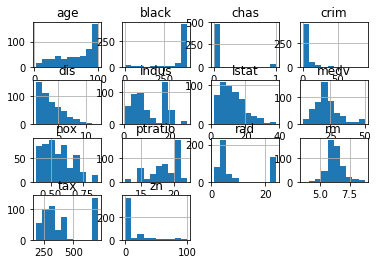

In [ ]:
# we look at the distribution of data and its descriptive statistics
df.hist()
plt.show()

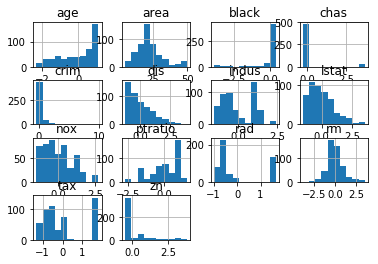

In [ ]:
# Now plot the histogram after standardization
dataStandDf.hist()
plt.show()

In [ ]:
# separate array into input and output components
scaler = Normalizer().fit(X1)
normalizedX = scaler.transform(X1)

In [ ]:
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[1.264e-05 3.600e-02 4.620e-03 0.000e+00 1.076e-03 1.315e-02 1.304e-01
  8.179e-03 2.000e-03 5.919e-01 3.060e-02 7.937e-01 9.959e-03]
 [5.785e-05 0.000e+00 1.498e-02 0.000e+00 9.935e-04 1.360e-02 1.671e-01
  1.052e-02 4.237e-03 5.126e-01 3.771e-02 8.408e-01 1.936e-02]
 [5.857e-05 0.000e+00 1.517e-02 0.000e+00 1.007e-03 1.542e-02 1.311e-01
  1.066e-02 4.293e-03 5.194e-01 3.820e-02 8.431e-01 8.650e-03]
 [7.105e-05 0.000e+00 4.785e-03 0.000e+00 1.005e-03 1.536e-02 1.005e-01
  1.331e-02 6.585e-03 4.873e-01 4.104e-02 8.662e-01 6.453e-03]
 [1.506e-04 0.000e+00 4.755e-03 0.000e+00 9.989e-04 1.559e-02 1.182e-01
  1.322e-02 6.543e-03 4.842e-01 4.078e-02 8.656e-01 1.162e-02]]


In [ ]:
# you can make a new data frame with the normalized data
dataNormDf = pd.DataFrame(normalizedX, columns = X1names)
dataNormDf['area'] = Y1.values 

In [ ]:
# show descriptive stats after standardization
set_option('display.width', 100)
set_option('precision', 1)
descriptionNorm = dataNormDf.describe()
print(descriptionNorm)

          crim       zn    indus     chas      nox       rm      age      dis      rad    tax  \
count  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  506.0   
mean   5.1e-03  2.3e-02  1.9e-02  1.3e-04  9.9e-04  1.2e-02  1.2e-01  7.3e-03  1.5e-02    0.7   
std    1.2e-02  4.7e-02  1.1e-02  4.8e-04  1.9e-04  2.7e-03  4.8e-02  4.6e-03  1.1e-02    0.2   
min    1.3e-05  0.0e+00  9.6e-04  0.0e+00  6.6e-04  4.7e-03  6.4e-03  1.5e-03  1.7e-03    0.4   
25%    1.6e-04  0.0e+00  1.1e-02  0.0e+00  8.7e-04  9.4e-03  8.6e-02  3.3e-03  7.9e-03    0.6   
50%    5.0e-04  0.0e+00  1.7e-02  0.0e+00  9.7e-04  1.2e-02  1.3e-01  6.4e-03  1.0e-02    0.7   
75%    5.2e-03  2.5e-02  2.4e-02  0.0e+00  1.1e-03  1.3e-02  1.6e-01  1.1e-02  3.1e-02    0.9   
max    1.1e-01  2.1e-01  6.1e-02  2.4e-03  2.1e-03  1.8e-02  2.4e-01  2.8e-02  3.6e-02    1.0   

       ptratio    black    lstat   area  
count  5.1e+02  5.1e+02  5.1e+02  506.0  
mean   3.3e-02  6.6e-01  2.2e-02   22.5  


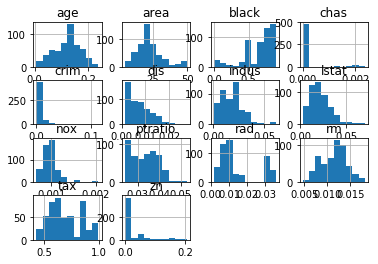

In [ ]:
# we look at the distribution of data and its descriptive statistics
dataNormDf.hist()
plt.show()

In [ ]:
# correlation heat map, pay attention to correlation between all predicators/features and each predictor and the output
plt.figure() # new plot
corMat = df.corr(method='pearson')
print(corMat)

            crim       zn    indus     chas      nox       rm      age      dis      rad      tax  \
crim     1.0e+00 -2.0e-01  4.1e-01 -5.6e-02  4.2e-01 -2.2e-01  3.5e-01 -3.8e-01  6.3e-01  5.8e-01   
zn      -2.0e-01  1.0e+00 -5.3e-01 -4.3e-02 -5.2e-01  3.1e-01 -5.7e-01  6.6e-01 -3.1e-01 -3.1e-01   
indus    4.1e-01 -5.3e-01  1.0e+00  6.3e-02  7.6e-01 -3.9e-01  6.4e-01 -7.1e-01  6.0e-01  7.2e-01   
chas    -5.6e-02 -4.3e-02  6.3e-02  1.0e+00  9.1e-02  9.1e-02  8.7e-02 -9.9e-02 -7.4e-03 -3.6e-02   
nox      4.2e-01 -5.2e-01  7.6e-01  9.1e-02  1.0e+00 -3.0e-01  7.3e-01 -7.7e-01  6.1e-01  6.7e-01   
rm      -2.2e-01  3.1e-01 -3.9e-01  9.1e-02 -3.0e-01  1.0e+00 -2.4e-01  2.1e-01 -2.1e-01 -2.9e-01   
age      3.5e-01 -5.7e-01  6.4e-01  8.7e-02  7.3e-01 -2.4e-01  1.0e+00 -7.5e-01  4.6e-01  5.1e-01   
dis     -3.8e-01  6.6e-01 -7.1e-01 -9.9e-02 -7.7e-01  2.1e-01 -7.5e-01  1.0e+00 -4.9e-01 -5.3e-01   
rad      6.3e-01 -3.1e-01  6.0e-01 -7.4e-03  6.1e-01 -2.1e-01  4.6e-01 -4.9e-01  1.0e+00  9

<Figure size 432x288 with 0 Axes>

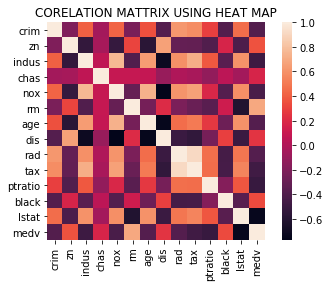

In [ ]:
## plot correlation matrix as a heat map
sns.heatmap(corMat, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("CORELATION MATTRIX USING HEAT MAP")
plt.show()

<Figure size 432x288 with 0 Axes>

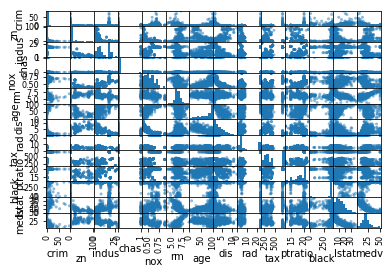

In [ ]:
## scatter plot of all data
plt.figure()
scatter_matrix(df)
plt.show()